<a href="https://colab.research.google.com/github/Forever-D14/Corrupt_ML/blob/main/last_df_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [4]:
asf = pd.read_csv("https://raw.githubusercontent.com/Forever-D14/Corrupt_ML/main/CPI_dinero.csv", index_col=0)

##Funciones Implementadas para sacar información del dataset

In [13]:
def renom_estados(name):
  estados = {
    'Michoacán de Ocampo': 'Michoacán', 
    'México': 'Estado de México', 
    'Veracruz Ignacio de la Llave': 'Veracruz',
    'Coahuila de Zaragoza': 'Coahuila'}

  if name in estados:
    return estados[name]
  
  return name

def get_ds_asf():
  ds_asf = pd.read_csv(
    'https://raw.githubusercontent.com/Erick-INCS/Corruption-analysis/main/datasets/asf_2017-2019.csv',
    encoding='latin-1')
  ds_asf['terminado'] = ds_asf['Estado de Trámite'].isin(['Con seguimiento concluido','Conclusión'])
  ds_asf['desaparecido'] = ds_asf['Texto Acción'].apply(get_money)
  ds_asf['Entidad Federativa'] = ds_asf['Entidad Federativa'].map(renom_estados)
  return ds_asf



def get_money(text):

  if pd.isna(text):    
    return np.nan
  re_dinero = re.compile(r'monto de ([\d|,|\.]+) pesos')
  res = re_dinero.search(text)
  if res:
    re_num = re.compile(r'[^0-9]')
    return float(re.sub(re_num, '', res.groups()[0][:-3]))
  return np.nan



###Importamos el dataset de ASF

In [30]:
ds_asf = get_ds_asf()
ds_asf.dropna(subset = ["desaparecido"], inplace=True)
ds_asf

,Año Cuenta Pública,Grupo Funcional,Sector,Ente Fiscalizado,Entidad Federativa,Tipo Auditoría,Número,Título,Universo (miles pesos),Muestra (miles pesos),Ente a quien se dirige la Acción,Tipo Acción,Clave Acción,Acción Superveniente,Texto Acción,Estado de Trámite,Auditorías,Acciones,terminado,desaparecido
0,2019,Gasto Federalizado,Aportaciones A Seguridad Social,Instituto Mexicano del Seguro Social,Ciudad de México,De Cumplimiento,1393,Programa de Atención a la Salud y Medicamentos...,"1,342,933.00","1,342,933.00",Instituto Mexicano del Seguro Social,Pliego de Observaciones,2019-1-19GYR-19-1393-06-001,-,"Se presume un probable daño o perjuicio, o amb...",En seguimiento,1,1,False,1.342933e+09
15,2019,Gasto Federalizado,Educación Pública,Comisión Nacional de Libros de Texto Gratuitos,Ciudad de México,De Cumplimiento,1464,Programa Nacional de Inglés,"160,000.00","98,183.20",Comisión Nacional de Libros de Texto Gratuitos,Pliego de Observaciones,2019-1-11L6J-19-1464-06-001,-,"Se presume un probable daño o perjuicio, o amb...",En seguimiento,1,1,False,8.134730e+05
27,2019,Gasto Federalizado,Educación Pública,Secretaría de Educación Pública,Ciudad de México,De Cumplimiento,107,Programa Nacional de Inglés,-,-,Secretaría de Educación Pública,Pliego de Observaciones,2019-0-11100-19-0107-06-001,-,"Se presume un probable daño o perjuicio, o amb...",Con seguimiento concluido,1,1,True,4.600000e+07
28,2019,Gasto Federalizado,Educación Pública,Secretaría de Educación Pública,Ciudad de México,De Cumplimiento,107,Programa Nacional de Inglés,-,-,Secretaría de Educación Pública,Pliego de Observaciones,2019-0-11100-19-0107-06-002,-,"Se presume un probable daño o perjuicio, o amb...",Con seguimiento concluido,1,1,True,2.820680e+07
68,2019,Gasto Federalizado,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,De Cumplimiento,38,Recursos del Fondo Regional,"1,868,788.20","1,353,184.30",Secretaría de Hacienda y Crédito Público,Pliego de Observaciones,2019-0-06100-19-0038-06-001,-,"Se presume un probable daño o perjuicio, o amb...",En seguimiento,1,1,False,4.038850e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,2014,Gasto Federalizado,"Ramos Generales 23, 33 y Otros","Municipio de Zapopan, Jalisco",Jalisco,Financiera y de Cumplimiento,896,Recursos para el Otorgamiento de Subsidios a l...,"81,668.50","68,904.60","Municipio de Zapopan, Jalisco",Pliego de Observaciones,14-D-14120-14-0896-06-001,-,Se presume un probable daño o perjuicio o ambo...,Con seguimiento concluido,1,1,True,1.247210e+05
32365,2014,Gasto Federalizado,"Ramos Generales 23, 33 y Otros","Municipio de Zapopan, Jalisco",Jalisco,Financiera y de Cumplimiento,1483,Recursos del Fondo de Aportaciones para la Inf...,"57,781.10","52,508.80","Municipio de Zapopan, Jalisco",Pliego de Observaciones,14-D-14120-14-1483-06-002,-,Se presume un probable daño o perjuicio o ambo...,Con seguimiento concluido,1,1,True,9.397130e+05
32367,2014,Gasto Federalizado,"Ramos Generales 23, 33 y Otros","Municipio de Zapopan, Jalisco",Jalisco,Financiera y de Cumplimiento,1483,Recursos del Fondo de Aportaciones para la Inf...,"57,781.10","52,508.80","Municipio de Zapopan, Jalisco",Pliego de Observaciones,14-D-14120-14-1483-06-001,-,Se presume un probable daño o perjuicio o ambo...,Con seguimiento concluido,1,1,True,3.006104e+06
32373,2014,Gasto Federalizado,"Ramos Generales 23, 33 y Otros","Municipio de Zaragoza, Coahuila de Zaragoza",Coahuila,Financiera y de Cumplimiento,1484,Recursos del Fondo de Aportaciones para la Inf...,"2,580.20","2,580.20","Municipio de Zaragoza, Coahuila de Zaragoza",Pliego de Observaciones,14-D-05038-14-1484-06-001,-,Se presume un probable daño o perjuicio o ambo...,Con seguimiento concluido,1,1,True,1.000000e+05


Columnas que nos servirán para unir con el CPI y con el presupuesto

In [39]:
columns = ["Año Cuenta Pública", "Sector", "Ente Fiscalizado", "Entidad Federativa", "Auditorías", "Acciones", "terminado", "desaparecido"]

In [98]:
asf_df = pd.DataFrame(ds_asf.groupby('Número')[columns].first())
asf_df

,Año Cuenta Pública,Sector,Ente Fiscalizado,Entidad Federativa,Auditorías,Acciones,terminado,desaparecido
Número,,,,,,,,
25,2018,Seguridad y Protección Ciudadana,Secretariado Ejecutivo del Sistema Nacional de...,Ciudad de México,1,1,False,6986770.0
38,2019,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,False,403885.0
43,2016,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Coahuila de Zaragoza,Coahuila,1,1,True,135165.0
48,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,True,13792195.0
49,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,False,5835000.0
...,...,...,...,...,...,...,...,...
1847,2016,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Oaxaca,Oaxaca,1,1,True,176598.0
1863,2016,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Oaxaca,Oaxaca,1,1,True,3817262.0
1868,2016,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Quintana Roo,Quintana Roo,1,1,False,2663285.0


###Importamos el dataset de CPI

In [56]:
ds_cpi = pd.read_csv('https://raw.githubusercontent.com/Erick-INCS/Corruption-analysis/main/datasets/CPI_Mex_full.csv')
ds_cpi['estado'] = ds_cpi['estado'].map(renom_estados)

ds_cpi.rename(columns = {'estado':'Entidad Federativa'},inplace=True)

cpi_df = pd.DataFrame(ds_cpi.groupby('Entidad Federativa')['CALIDAD DE VIDA'].mean())

cpi_df.reset_index(level=0, inplace=True)
cpi_df

,Entidad Federativa,CALIDAD DE VIDA
0,Aguascalientes,64.423333
1,Baja California,56.516000
2,Baja California Sur,59.900000
3,Campeche,71.995000
4,Chiapas,62.757143
5,Chihuahua,61.670000
6,Ciudad de México,71.718750
7,Coahuila,62.258750
8,Colima,69.375000
9,Durango,60.800000


###Realizamos un Merge con los datasets anteriores para posteriormente unirlo con el presupuesto

In [59]:
asf_cpi_df = pd.merge(asf_df,cpi_df, on = 'Entidad Federativa')
asf_cpi_df

,Año Cuenta Pública,Sector,Ente Fiscalizado,Entidad Federativa,Auditorías,Acciones,terminado,desaparecido,CALIDAD DE VIDA
0,2018,Seguridad y Protección Ciudadana,Secretariado Ejecutivo del Sistema Nacional de...,Ciudad de México,1,1,False,6986770.0,71.71875
1,2019,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,False,403885.0,71.71875
2,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,True,13792195.0,71.71875
3,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,False,5835000.0,71.71875
4,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,1,1,False,8580500.0,71.71875
...,...,...,...,...,...,...,...,...,...
1255,2016,"Ramos Generales 23, 33 y Otros","Municipio de Chiautempan, Tlaxcala",Tlaxcala,1,1,True,9612979.0,66.47750
1256,2015,"Ramos Generales 23, 33 y Otros","Municipio de Chiautempan, Tlaxcala",Tlaxcala,1,1,True,265934.0,66.47750
1257,2016,"Ramos Generales 23, 33 y Otros","Municipio de Tlaxco, Tlaxcala",Tlaxcala,1,1,True,662467.0,66.47750
1258,2016,"Ramos Generales 23, 33 y Otros","Municipio de Zacatelco, Tlaxcala",Tlaxcala,1,1,False,6461709.0,66.47750


###Importamos dataset de Presupuesto

In [83]:
df_pres = pd.read_parquet('https://github.com/Erick-INCS/Corruption-analysis/blob/main/datasets/presupuesto_2017-2020.parquet?raw=true')
df_pres['ENTIDAD_FEDERATIVA'] = df_pres['ENTIDAD_FEDERATIVA'].map(renom_estados)

In [84]:
pres_df = pd.DataFrame(df_pres.groupby(['ENTIDAD_FEDERATIVA', 'CICLO'])['MONTO_MODIFICADO'].sum())
pres_df.reset_index(level=0, inplace=True)
pres_df.reset_index(level=0, inplace=True)


pres_df.rename(columns={
    'CICLO' : 'Año Cuenta Pública',
    'ENTIDAD_FEDERATIVA' : 'Entidad Federativa',
    'MONTO_MODIFICADO' : 'Presupuesto Anual'}, 
    inplace=True)

pres_df.dropna(subset= ['Presupuesto Anual'], inplace = True)

###Juntamos los 3 datasets en uno

In [100]:
final =  pd.merge(asf_cpi_df, pres_df, on = ['Año Cuenta Pública', 'Entidad Federativa'])
final[['Sector', 'Ente Fiscalizado', 'Entidad Federativa']] = final[['Sector', 'Ente Fiscalizado', 'Entidad Federativa']].astype('category')
final['Porcentaje Desviado'] = (final['desaparecido']*100)/final['Presupuesto Anual']

In [101]:
final.drop(columns=['Auditorías', 'Acciones'], inplace=True)
final

,Año Cuenta Pública,Sector,Ente Fiscalizado,Entidad Federativa,terminado,desaparecido,CALIDAD DE VIDA,Presupuesto Anual,Porcentaje Desviado
0,2018,Seguridad y Protección Ciudadana,Secretariado Ejecutivo del Sistema Nacional de...,Ciudad de México,False,6986770.0,71.71875,3.171707e+10,0.022028
1,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,True,13792195.0,71.71875,3.171707e+10,0.043485
2,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,False,5835000.0,71.71875,3.171707e+10,0.018397
3,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,False,8580500.0,71.71875,3.171707e+10,0.027053
4,2018,Previsiones y Aportaciones Para Los Sistemas d...,Autoridad Educativa Federal en la Ciudad de Mé...,Ciudad de México,False,712306.0,71.71875,3.171707e+10,0.002246
...,...,...,...,...,...,...,...,...,...
643,2019,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,False,2374014.0,66.47750,7.705672e+10,0.003081
644,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,True,100695.0,66.47750,1.537670e+10,0.000655
645,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,False,25590820.0,66.47750,1.537670e+10,0.166426
646,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,False,950404.0,66.47750,1.537670e+10,0.006181


Porcentaje Desviado por Entidad Federativa

In [102]:
final.groupby('Entidad Federativa')['Porcentaje Desviado'].sum()

Entidad Federativa
Aguascalientes         0.808720
Baja California        0.221202
Baja California Sur    1.210316
Campeche               4.184759
Chiapas                1.114776
Chihuahua              9.468353
Ciudad de México       8.892125
Coahuila               0.265711
Colima                 1.635052
Durango                0.131798
Estado de México       1.688379
Guanajuato             6.890633
Guerrero               0.736721
Hidalgo                0.048341
Jalisco                0.361894
Michoacán              0.362989
Morelos                1.458721
Nayarit                7.402870
Nuevo León             0.790356
Oaxaca                 7.718375
Puebla                 4.245454
Querétaro              0.000903
Quintana Roo           4.184278
San Luis Potosí        0.654842
Sinaloa                0.078511
Sonora                 0.029397
Tabasco                0.638950
Tamaulipas             0.332134
Tlaxcala               0.201916
Yucatán                0.273176
Zacatecas            

##Standarizamos los datos 

In [125]:
from sklearn.preprocessing import StandardScaler

std_scaler =  StandardScaler()
fe =  final[['Año Cuenta Pública', 'Sector', 'Ente Fiscalizado', 'Entidad Federativa']].copy()
ff = final[["desaparecido", "CALIDAD DE VIDA", "Presupuesto Anual", "Porcentaje Desviado"]].copy()

ff[ff.columns] = std_scaler.fit_transform(ff)

zz = pd.concat([fe,ff], axis=1)
zz

,Año Cuenta Pública,Sector,Ente Fiscalizado,Entidad Federativa,desaparecido,CALIDAD DE VIDA,Presupuesto Anual,Porcentaje Desviado
0,2018,Seguridad y Protección Ciudadana,Secretariado Ejecutivo del Sistema Nacional de...,Ciudad de México,-0.147893,2.082324,-0.718226,-0.143139
1,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,-0.123205,2.082324,-0.718226,-0.104761
2,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,-0.152071,2.082324,-0.718226,-0.149634
3,2018,Hacienda y Crédito Público,Secretaría de Hacienda y Crédito Público,Ciudad de México,-0.142112,2.082324,-0.718226,-0.134151
4,2018,Previsiones y Aportaciones Para Los Sistemas d...,Autoridad Educativa Federal en la Ciudad de Mé...,Ciudad de México,-0.170655,2.082324,-0.718226,-0.178522
...,...,...,...,...,...,...,...,...
643,2019,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,-0.164627,0.599864,-0.297095,-0.177028
644,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,-0.172873,0.599864,-0.870002,-0.181367
645,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,-0.080404,0.599864,-0.870002,0.115130
646,2018,"Ramos Generales 23, 33 y Otros",Gobierno del Estado de Tlaxcala,Tlaxcala,-0.169791,0.599864,-0.870002,-0.171484


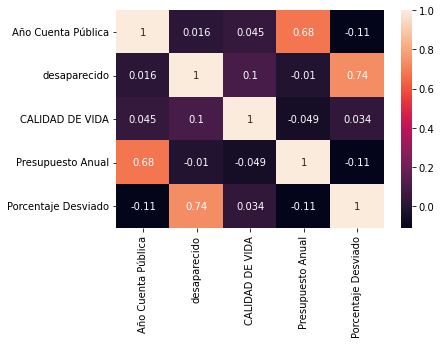

In [126]:
sns.heatmap(zz.corr(), annot=True)

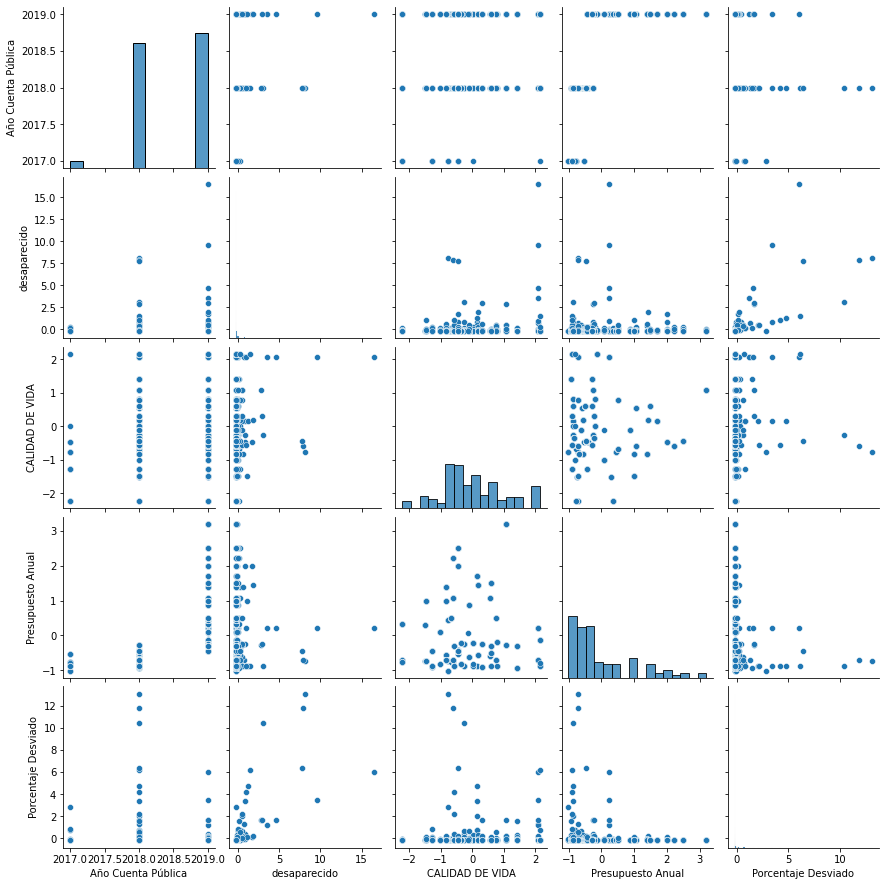

In [127]:
sns.pairplot(zz)